In [21]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
toCPU=lambda x: x.detach().cpu().numpy()
toCUDA=lambda x: torch.tensor(x).cuda()

class gaussian_kde(nn.Module):
    def __init__(self,Y):
        super(gaussian_kde, self).__init__()
        self.Y = Y
    
    def forward(self,x,sigma):
        x = torch.unsqueeze(x, 0) - torch.unsqueeze(self.Y, 1)
        x = torch.exp(-0.5*(x/sigma)**2) / (sigma * np.sqrt(np.pi*2)*self.Y.shape[0])
        x = x.sum(dim=1)
        return x

epsilon = 1e-10
class KL_loss(nn.Module):
    def __init__(self):
        super(KL_loss, self).__init__()

    def forward(self, P, Q):
        '''
        get the KL of two density series #P and #Q
        '''
        P = P + epsilon
        Q = Q + epsilon
        KL = (P * torch.log(P) - P * torch.log(Q))
        KL = torch.sum(KL)
        return KL

In [36]:
pred=torch.rand(1000).cuda()*60
pred.requires_grad=True
y_true=torch.rand(1000).cuda()*60
y_true.retain_grad=True


KDE=gaussian_kde(y_true)
KL=KL_loss()

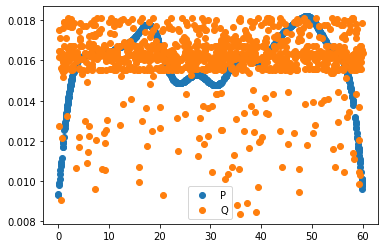

In [37]:
P=KDE(y_true,2.5)
Q=KDE(pred,2.5)

plt.scatter(toCPU(y_true),toCPU(P),label='P')
plt.scatter(toCPU(pred),toCPU(Q),label='Q')
plt.legend()
plt.show()

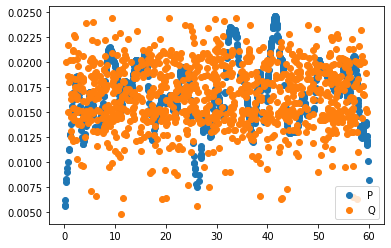

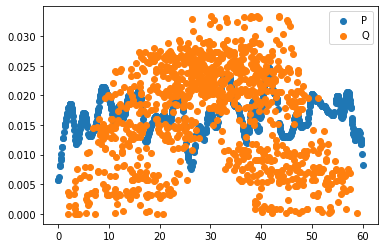

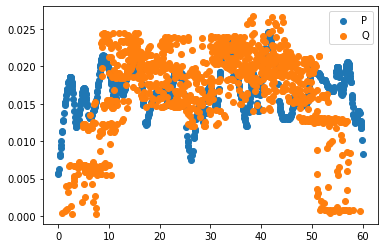

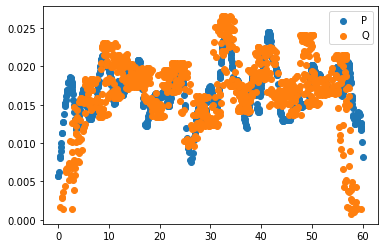

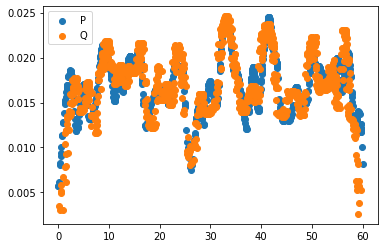

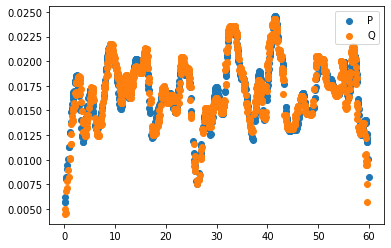

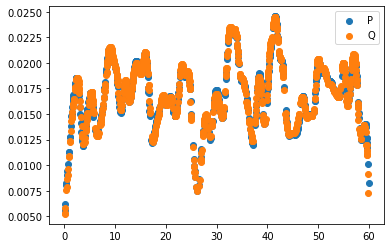

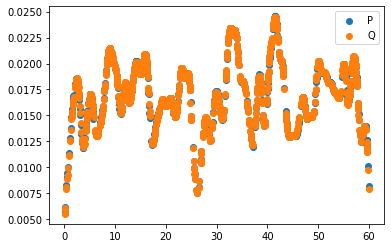

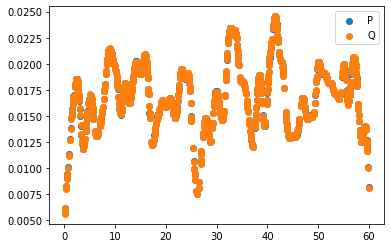

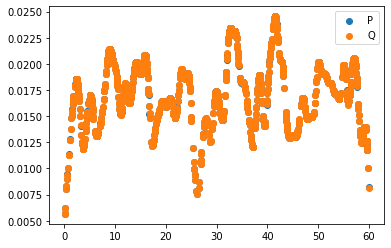

In [58]:
pred=torch.rand(1000).cuda()*60
pred.requires_grad=True
y_true=torch.rand(1000).cuda()*60
y_true.retain_grad=True

KDE=gaussian_kde(y_true)
KL=KL_loss()

for epoch in range(500):
    pred.retain_grad()
    P=KDE(y_true,0.5)
    Q=KDE(pred,0.5)
    loss = torch.mean( (P/Q).detach()*(pred-y_true)**2 )
#     loss = torch.mean( (pred-y_true)**2 )
    loss.backward()
    pred=pred-10*pred.grad
    pred.grad=None
    
    
    if epoch%50==0:
        plt.scatter(toCPU(y_true),toCPU(P),label='P')
        plt.scatter(toCPU(pred),toCPU(Q),label='Q')
#         plt.hist(toCPU(P),label='P')
#         plt.hist(toCPU(Q),label='Q')
        plt.legend()
        plt.show()